# **Predicting House Prices - Intro to Linear Regression**

### **Linear regression**

A **linear regression** is the act of modelling a linear relationship between a response (or dependent) variable and one or more explanatory (independent) variables (X). When the model consists of only one dependent variable and one independent variable, the regression is called "Simple Linear Regression". When it has more than one independent variable it is called "Multiple Linear Regression".

For a linear regression model to adequately perform (or describe) a dataset, it needs to meet certain conditions or assumptions such as:

- Linearity.
- No multicollinearity.
- Gaussian (Normal) distribution of the error (residuals) terms.
- Homoskedasticity.
- No autocorrelation.
- Zero conditional mean.

### **About the dataset**

In this exersice, the dataset used is the **California Housing Prices** available to the public on [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

**Objective**

This is a notebook created with the objective of putting into practice the linear regression concepts learned from the second unit of the [Machine Learning Zoomcamp](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp), based on the book **"Machine Learning Bookcamp"** written by Alexey Grigorev.

### **Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Magic function to render matplotlib graphs in jupyter notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Always make good looking plots!
plt.style.use('ggplot')

### **Reading the dataframe**

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


### **Data Pre-processing**

Since the homework for this second unit states to use only the numerical values, the **"ocean_proximity"** feature from the dataframe will be removed as follows:

In [5]:
df.drop("ocean_proximity", axis=1, inplace=True)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
# Checking for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The dataset shows 207 missing values on the **total_bedrooms** variable only. Since missing values sometimes can be a problem for implementing ML models, there is a need to deal with them either by removing them or by filling them up with new values. Depending on the project's objectives. However, for this exercise, this values will be treated later on.

### **Initial EDA**

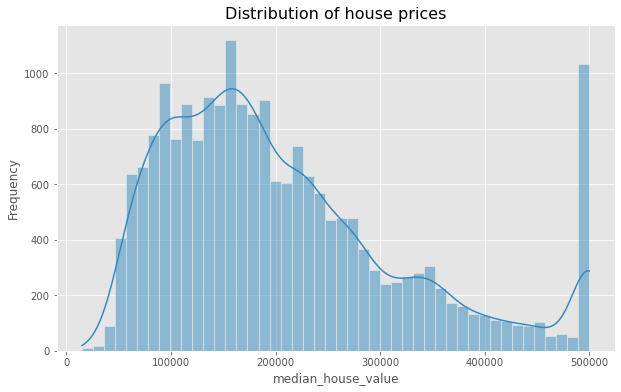

In [8]:
# Creating a histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df["median_house_value"], kde=True)
plt.title("Distribution of house prices", fontsize=16)
plt.xlabel("median_house_value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

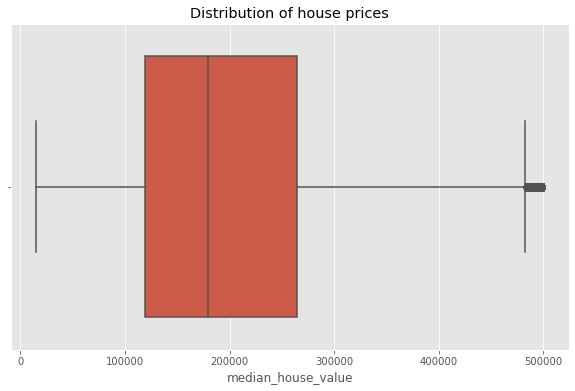

In [9]:
plt.figure(figsize=(10, 6))
g = sns.boxplot(df["median_house_value"])
g.set_title("Distribution of house prices")
plt.show()

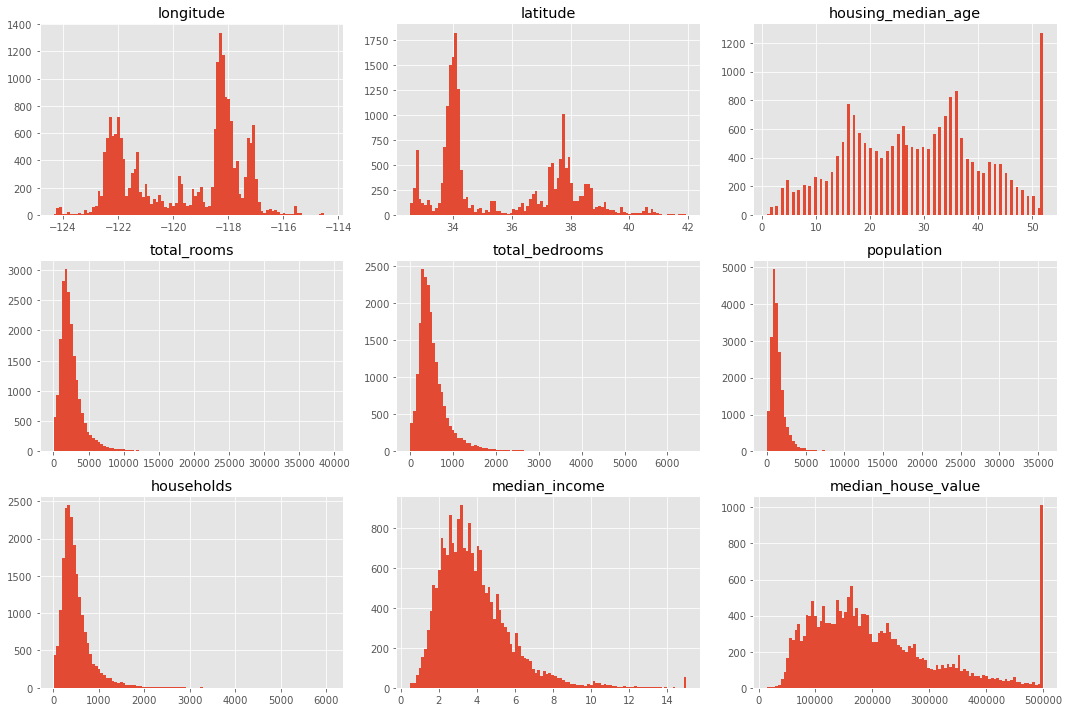

In [10]:
# Inspecting the other features
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()
df.hist(column=[
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
], bins=100, ax=ax, layout=(3, 3))
plt.tight_layout()
plt.show()

It seems that the distribution of house prices is *slightly right-skewed*. However, there is a particular large amount of houses around the 500k USD. This seems quite odd since the real-state market trends might suggest that the number of houses around that cost would be much less. Let's check how many observations are in the dataset over 500k USD:

In [11]:
df[df["median_house_value"] > 5e5]["median_house_value"].describe()

count       965.0
mean     500001.0
std           0.0
min      500001.0
25%      500001.0
50%      500001.0
75%      500001.0
max      500001.0
Name: median_house_value, dtype: float64

According to this, 965 of the most expensive houses with prices over 500k USD where registered and grouped with the odd value of 500.001 USD. Therefore, given the learning purposes of this notebook, this houses will be removed. However, in the real world, this would have been handled in a different manner. Questions related to the data collecting methods would have been asked to the people involved in such procedure and, therefore, avoid missinterpretations.

In [12]:
df = df[df["median_house_value"] < 500001]

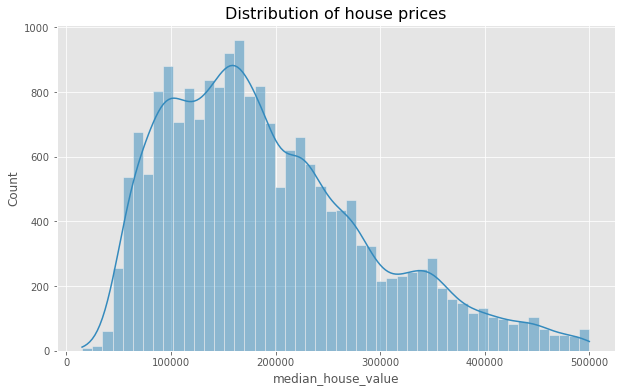

In [13]:
# Distribution of target variable without the group of houses > 500k USD
plt.figure(figsize=(10, 6))
sns.histplot(df["median_house_value"], kde=True)
plt.title("Distribution of house prices", fontsize=16)
plt.show()

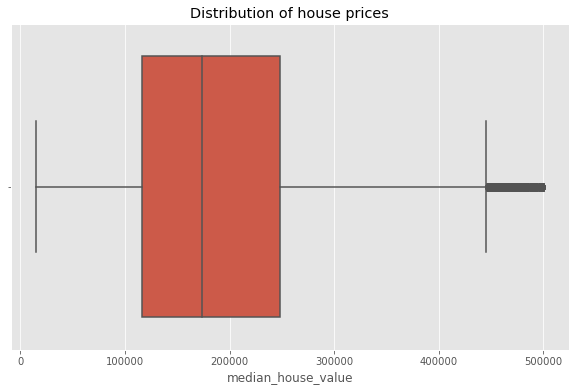

In [14]:
plt.figure(figsize=(10, 6))
g = sns.boxplot(df["median_house_value"])
g.set_title("Distribution of house prices")
plt.show()

It is curious how the number of outliers seems to have increased after removing the group of expensive houses, according to what's observed from the previous boxplot. However, handling the outliers will not be part of this excersise.

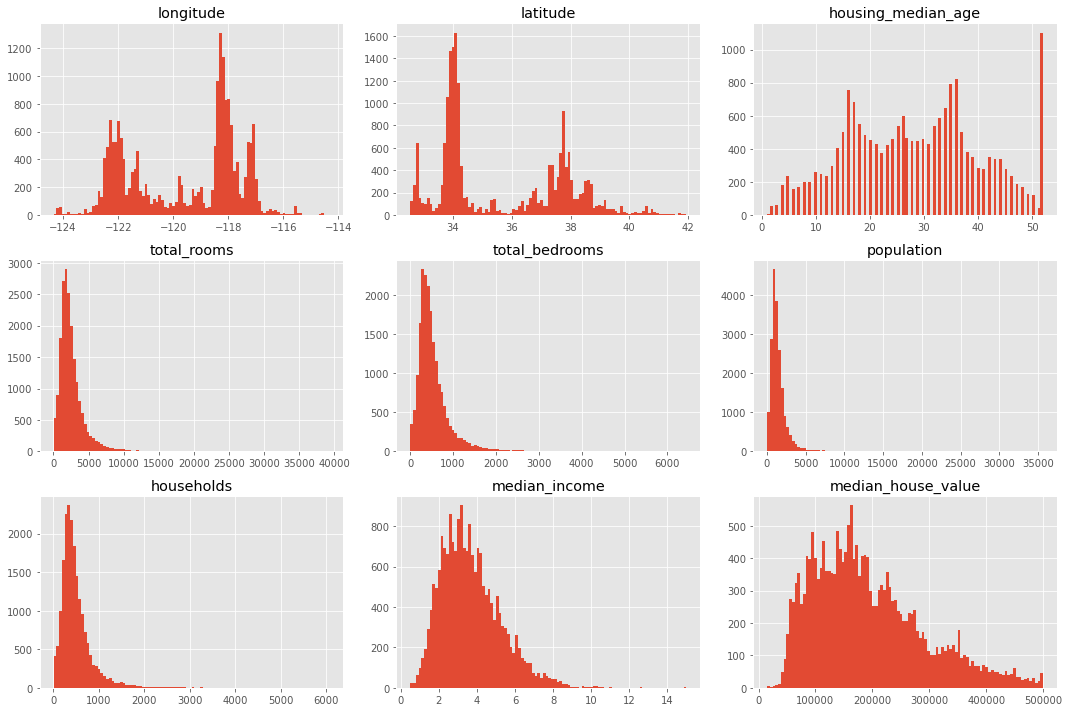

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()
df.hist(column=[
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
], bins=100, ax=ax, layout=(3, 3))
plt.tight_layout()
plt.show()

### **Validation framework**

Given the nature of the Machine Learning modeling, the complete dataset is splitted into three parts known as **training**, **validation** and **testing** subsets. The proportions of this susbets are 60% for training, 20% for validation and 20% for testing. However, since the dataset obeys a specific order, its entries need to be randomly re-accomodated to perform the splitting afterwards:

In [16]:
# Seed for reproducibility
np.random.seed(42)

# Shuffling the dataset
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Defining the lengths of the subsets
n_val = int(n * 0.2)                                            # 20% validation
n_test = int(n * 0.2)                                           # 20% testing
n_train = n - (n_val + n_test)                                  # 60% training

# Defining the subsets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [17]:
n, n_train, n_val, n_test

(19675, 11805, 3935, 3935)

In [18]:
df_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15065,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,104200.0
14534,-117.14,32.93,14.0,1946.0,463.0,1205.0,390.0,4.2109,171200.0
13570,-117.29,34.14,52.0,1683.0,266.0,646.0,256.0,4.0481,97300.0
2607,-124.01,40.97,21.0,1513.0,319.0,943.0,301.0,3.5380,102700.0
12750,-121.38,38.62,34.0,2352.0,610.0,1127.0,592.0,2.2000,116500.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0
2147,-119.77,36.78,36.0,3616.0,779.0,1994.0,786.0,2.5434,67300.0
19839,-119.29,36.52,39.0,858.0,228.0,1222.0,224.0,1.5714,43000.0
16692,-120.61,35.12,12.0,3430.0,793.0,1840.0,720.0,2.9821,162000.0
14748,-117.05,32.58,25.0,2185.0,370.0,1558.0,369.0,5.3072,132700.0


In [19]:
# Defining the target variables for each subset
y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values
y_test = df_test["median_house_value"].values

# Deleting target variable from subsets to avoid perfect fitting
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

### **Defining the model**

In [20]:
def train_linear_regression(X, y):
    """
    Function to train the linear model.
    
    Parameters:

    - X: Prepared matrix X with the values of predictors.
    - y: Vector with the values of the target variable.
    
    y = g(X) - General Machine Learning model equation, where:
    - X is the matrix of variables.
    - g is the ML model.
    - y is the predicted values.

    Returns:

    (w[0], w[1:]) -> Tuple type object.
    - w[0]: First element of the w vector. -> numpy.float64 type object.
    - w[1:]: Elements of the w vector from the positional index 1 until the last one. -> numpy.ndarray type object.
    """
    ones = np.ones(shape=X.shape[0])    # Dummy values for x vectors
    X = np.column_stack([ones, X])      # Stack dummy values x[0] = 1

    XTX = X.T.dot(X)                    # Dot product of the transpose of the matrix X and the matrix X to get a squared shape matrix
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)         # Normal equation: w = [(X^T).X]^(-1).(X^T).y

    return w[0], w[1:]

**Baseline solution**

In [21]:
# List of predictor columns
base = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Defining function to prepare X
def prepare_X(df, fillna_value):
    """
    Function to prepare the matrix X.

    Parameters:

    - df: DataFrame type object.
    - fillna_value: Value to fill up missing values - int or float type object.

    Returns:

    numpy.ndarray type object.
    - X: Prepared matrix X with the values of predictors.
    """
    df_num = df[base]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    
    return X

In [22]:
# Defining function to determine RMSE
def rmse(y, y_pred):
    """
    Function to calculate RMSE (Root Squared Mean Error).

    Parameters:

    - y: Vector with the values of the target variable. -> numpy.ndarray type object.
    - y_pred: Vector with predicted values. -> numpy.ndarray type object.

    y_pred = w_0 + X_val * w

    Returns:

    - numpy.float64 type object.
    """
    err = y_pred - y
    mse = (err ** 2).mean()
    return np.sqrt(mse)

Sometimes it's a good idea to fill the missing values with 0 in order to train a ML model. However, in this case it would not make sense for a house to have 0 total bedrooms since a house has at least one bedroom. Therefore, the other option to fill in missing values is to use the mean of all the other values of the feature, as outlined below:

In [23]:
# Filling up the missing values with the mean and preparing the X matrix
total_bedrooms_mean = df_train["total_bedrooms"].mean()
X_train = prepare_X(df_train, fillna_value=total_bedrooms_mean)

**Training the model**

In [24]:
w_0, w = train_linear_regression(X_train, y_train)

**Validating the model**

In [25]:
# Prepare the X matrix from the validation model, but using the same training mean
X_val = prepare_X(df_val, fillna_value=total_bedrooms_mean)
y_pred = w_0 + X_val.dot(w)

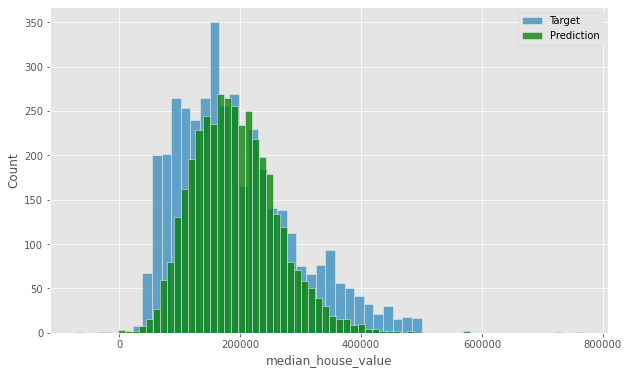

In [26]:
# Plot comparing the predicted values with the target values
plt.figure(figsize=(10, 6))
sns.histplot(y_val, label="Target")
sns.histplot(y_pred, label="Prediction", color="green")
plt.xlabel("median_house_value")
plt.legend()
plt.show()

In [27]:
# Calculating RMSE
np.round(rmse(y_val, y_pred), 2)

68717.75

As observed, the value obtained for the RMSE is quite large. This means that the **variability (or dispersion)** of the data is considerably high. However, it is common to find in the literature the use of lower values, since lower values means the data is less dispersed. It is important to work with low data variability because it allows ML models to have a *better performance when predicting values*, and a *more accurate decision-making* process.

In order to do this, the target variables need to be transformed. There are several transformations according to the needs and/or objectives of the study. However, in this case, the **logarithmic transformation** will be used since it is the most common one:

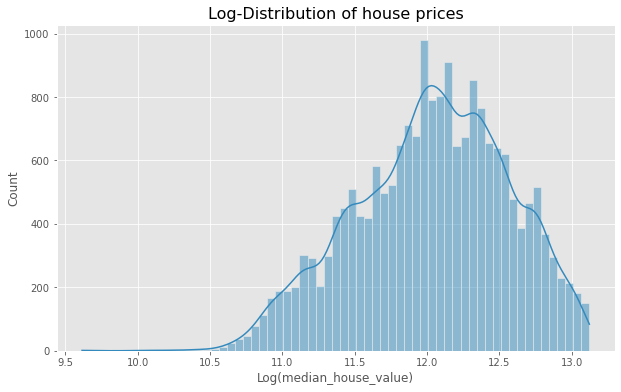

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df["median_house_value"].values), kde=True)
plt.title("Log-Distribution of house prices", fontsize=16)
plt.xlabel("Log(median_house_value)")
plt.show()

In [29]:
# Defining the training, validation and testing subsets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [30]:
# Transforming target variables to implement model with a more normal distribution
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

# Deleting target variable from subsets to avoid perfect fitting
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [31]:
# Filling up the missing values with the mean and preparing the X matrix
total_bedrooms_mean = df_train["total_bedrooms"].mean()
X_train = prepare_X(df_train, fillna_value=total_bedrooms_mean)

**Training the model**

In [32]:
w_0, w = train_linear_regression(X_train, y_train)

**Validating the model**

In [33]:
# Prepare the X matrix from the validation model, but using the same training mean
X_val = prepare_X(df_val, fillna_value=total_bedrooms_mean)
y_pred = w_0 + X_val.dot(w)

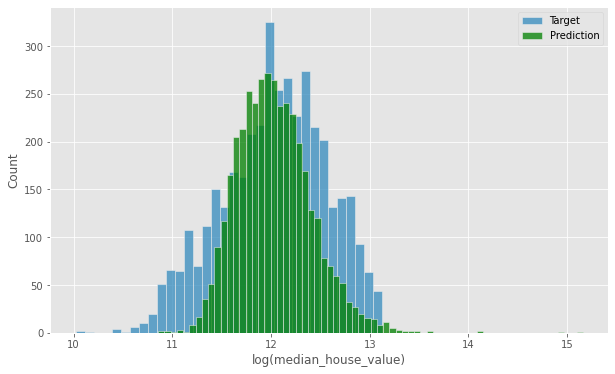

In [34]:
# Plot comparing the predicted values with the target values
plt.figure(figsize=(10, 6))
sns.histplot(y_val, label="Target")
sns.histplot(y_pred, label="Prediction", color="green")
plt.xlabel("log(median_house_value)")
plt.legend()
plt.show()

In [35]:
# Calculating RMSE
np.round(rmse(y_val, y_pred), 6)

0.379917

This time the RMSE value is much lower than before. And, as observed in the previous histogram, the data presents a more normal distribution.

Now, an interesting question that is worth asking is, what if the missing values are filled up with zeros instead of the mean. How would the performance of the model be affected? Will it improve it or will it be worse?

In [36]:
# Defining the training, validation and testing subsets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [37]:
# Transforming target variable to implement model with a better distribution
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

# Deleting target variable from subsets to avoid perfect fitting
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [38]:
# Filling up the missing values with zeros and preparing the X matrix
X_train = prepare_X(df_train, fillna_value=0.0)

**Training the model**

In [39]:
w_0, w = train_linear_regression(X_train, y_train)

**Validating the model**

In [40]:
# Prepare the X matrix from the validation model and filling up the missing values with zeros
X_val = prepare_X(df_val, fillna_value=0.0)
y_pred = w_0 + X_val.dot(w)

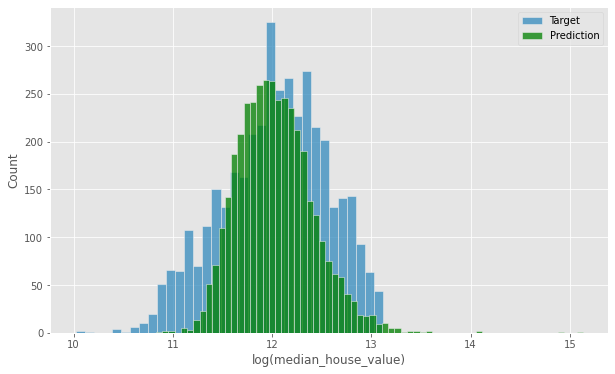

In [41]:
# Plot comparing the predicted values with the target values
plt.figure(figsize=(10, 6))
sns.histplot(y_val, label="Target")
sns.histplot(y_pred, label="Prediction", color="green")
plt.xlabel("log(median_house_value)")
plt.legend()
plt.show()

In [42]:
# Calculating RMSE
np.round(rmse(y_val, y_pred), 6)

0.380774

Comparing the new RMSE value with the old one, it can be seen that it increased. This means that if the missing values are filled with zeros, the model will perform a little worse than if the NaN's are filled with the mean. But, since the difference is not too big, it is perfectly ok to state that the models perform very simililarly and the predictions are quite the same.

### **Regularization**

Regularization basically means *controlling*, and in this case what needs to be controlled are the values of the w vector (also known as vector of weights). To do this, the previously defined training function needs to be re-defined as follows:

In [43]:
def train_linear_regression(X, y, r=0.0):
    """
    Function to train the linear model.
    
    Parameters:

    - X: Prepared matrix X with the values of predictors.
    - y: Vector with the values of the target variable.
    - r: Constant control parameter.
    
    y = g(X) - General Machine Learning model equation, where:
    - X is the matrix of variables.
    - g is the ML model.
    - y is the predicted values.

    Returns:

    (w[0], w[1:]) -> Tuple type object.
    - w[0]: First element of the w vector. -> numpy.float64 type object.
    - w[1:]: Elements of the w vector from the positional index 1 until the last one. -> numpy.ndarray type object.
    """
    ones = np.ones(shape=X.shape[0])    # Dummy values for x vectors
    X = np.column_stack([ones, X])      # Stack dummy values x[0] = 1

    XTX = X.T.dot(X)                    # Dot product of the transpose of the matrix X and the matrix X to get a squared shape matrix
    reg = r * np.eye(XTX.shape[0])      # Multiplying the control parameter by the identity matrix of XTX.
    XTX_new = XTX + reg                 # Adding the control parameter to the XTX matrix
    XTX_inv = np.linalg.inv(XTX_new)
    w = XTX_inv.dot(X.T).dot(y)         # Normal equation: w = [(X^T).X]^(-1).(X^T).y

    return w[0], w[1:]

In order to validate how the model performs with different r values, a for loop can be implemented. By doing this, it is possible to select the most optimized model.

In [44]:
# Using different r values
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print(f"r = {r}, RMSE = {np.round(rmse(y_val, y_pred), 5)}")

r = 0.0, RMSE = 0.38077
r = 1e-06, RMSE = 0.38077
r = 0.0001, RMSE = 0.38077
r = 0.001, RMSE = 0.38077
r = 0.01, RMSE = 0.38077
r = 0.1, RMSE = 0.38078
r = 1.0, RMSE = 0.3809
r = 5.0, RMSE = 0.38185
r = 10.0, RMSE = 0.38401


In this case, it is evidenced that the reglarization technique works better for lower values. The lower the r value, the better the model performs. However, below r = 0.01 the model is practically the same. Therefore, it is correct to say that, the best model for predicting house prices *of this particular arrangement of training, validation and testing subsets* is the one with r = 0.01. If the subsets are different (e.g. a different seed number), it is possible to obtain a different optimal r value.

**Checking RMSE for different seed values:**

In [45]:
seeds_list = list(range(0, 10, 1))

for item in seeds_list:
    # Seed for reproducibility
    np.random.seed(item)

    # Shuffling the dataset
    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    # Defining the subsets
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    # Transforming target variable to implement model with a better distribution
    y_train = np.log1p(df_train["median_house_value"].values)
    y_val = np.log1p(df_val["median_house_value"].values)
    y_test = np.log1p(df_test["median_house_value"].values)

    # Deleting target variable from subsets to avoid perfect fitting
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]

    # Filling up the missing values with zeros and preparing the X training matrix and X validation matrix
    X_train = prepare_X(df_train, fillna_value=0.0)
    X_val = prepare_X(df_val, fillna_value=0.0)
    
    r = [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]
    diff = 0
    prev_kpi = 0
    for alpha in r:
        while diff <= 1e-7:
            w_0, w = train_linear_regression(X_train, y_train, r=alpha)
            y_pred = w_0 + X_val.dot(w)
            kpi = rmse(y_val, y_pred)
            diff = kpi - prev_kpi
            if diff > 1e-3:
                diff = 0
                prev_kpi = kpi
                break
            else:
                prev_kpi = kpi
                best_r = alpha
                break
    print(f"Seed No.: {item} | RMSE: {round(kpi, 4)} | Best r: {best_r} | diff: {diff}")

Seed No.: 0 | RMSE: 0.3757 | Best r: 0.01 | diff: 4.467478720848739e-07
Seed No.: 1 | RMSE: 0.3696 | Best r: 0.001 | diff: 1.0851208831486048e-07
Seed No.: 2 | RMSE: 0.3798 | Best r: 10.0 | diff: 0.0009414379966921071
Seed No.: 3 | RMSE: 0.3654 | Best r: 0.01 | diff: 4.720826206616735e-07
Seed No.: 4 | RMSE: 0.3773 | Best r: 0.01 | diff: 9.095351168886268e-07
Seed No.: 5 | RMSE: 0.3688 | Best r: 0.01 | diff: 8.850693097861573e-07
Seed No.: 6 | RMSE: 0.3745 | Best r: 0.01 | diff: 2.5561083272229723e-07
Seed No.: 7 | RMSE: 0.3736 | Best r: 0.001 | diff: 1.2297155588258946e-07
Seed No.: 8 | RMSE: 0.3747 | Best r: 1.0 | diff: 5.316924943488122e-06
Seed No.: 9 | RMSE: 0.3861 | Best r: 0.001 | diff: 2.3750249544818303e-07


According to this, the model that best performs is the one implemented on the dataset shuffled with a seed value = 3.

In [46]:
# Seed for reproducibility
np.random.seed(3)

# Shuffling the dataset
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Defining the subsets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [47]:
# Transforming target variable to implement model with a better distribution
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

# Deleting target variable from subsets to avoid perfect fitting
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [48]:
# Filling up the missing values with zeros and preparing the X matrix
X_train = prepare_X(df_train, fillna_value=0.0)
w_0, w = train_linear_regression(X_train, y_train, r=0.01)
X_val = prepare_X(df_val, fillna_value=0.0)
y_pred = w_0 + X_val.dot(w)

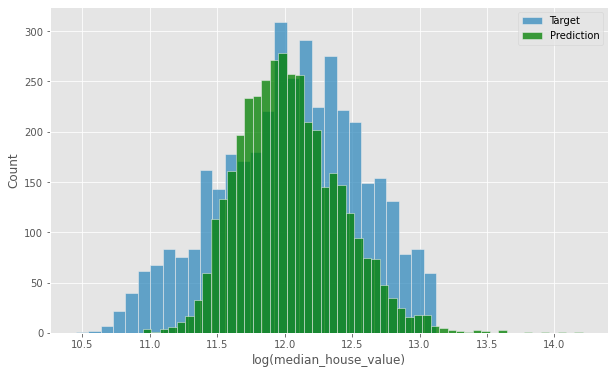

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(y_val, label="Target")
sns.histplot(y_pred, label="Prediction", color="green")
plt.xlabel("log(median_house_value)")
plt.legend()
plt.show()

In [50]:
print(f"r = 0.01, RMSE = {np.round(rmse(y_val, y_pred), 5)}")

r = 0.01, RMSE = 0.36543


**Testing the model**

In [51]:
X_test = prepare_X(df_test, fillna_value=0.0)
y_pred = w_0 + X_test.dot(w)
print("RMSE Testing:", np.round(rmse(y_test, y_pred), 5))

RMSE Testing: 0.37131


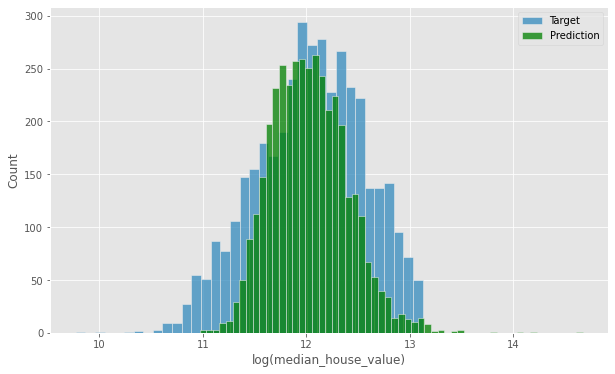

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label="Target")
sns.histplot(y_pred, label="Prediction", color="green")
plt.xlabel("log(median_house_value)")
plt.legend()
plt.show()

**Making a house price prediction**

In [53]:
# House index = 6672 from the testing subset
testing_house = {
    "housing_median_age": 40.0,
    "total_rooms": 1950.0,
    "total_bedrooms": 509.0,
    "population": 1038.0,
    "households": 438.0,
    "median_income": 2.6172
}

df_test = pd.DataFrame([testing_house])
X_test = prepare_X(df_test, fillna_value=0.0)
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
print("The suggested price is: ${:.2f} USD".format(suggestion[0]))
print("The listed price is: $196100.00 USD")

The suggested price is: $150744.53 USD
The listed price is: $196100.00 USD


According to this, the suggested price by the model (150.744,53 USD) is lower than the actual listed price (196.100,00 USD). Therefore, someone buying a house around this area might want to pay less than the actual listed price.

### **Takeaways**

- Regression is one of the most common types of ML techniques. It is used mostly to predict values of a specific target variable. However, it is based on the general equation y = g(X), and understanding these mathematical concepts is key for a successful application of a model.

- In order to implement a ML model, the data must be splitted into training, validation and testing subsets. It is important to fit the ML model to the training dataset in order to "teach" the model and minimize errors. After this, the model has to be tested against a testing subset. However, in order to prevent a model fitted too closely on the training data and gain more confidence, a validation subset is suggested.

- Another important part of implementing a ML model is the fact that most of the time the data needs to be transformed by using specific math concepts or algorithms. The reason behind this is because models perform better when the data dispersion is lower.

- Furthermore, it is crucial to measure the performance of the model and the way of doing this is by calculating parameters such as the RMSE or the MSE. The best model is the one that shows a lower RMSE (or MSE if that is the case).

- Sometimes numerical instabilities are unavoidable. These issues can be resolved with the implementation of *Regularization* which aims to control the obtention of extremely high weighting factors (w vector) and reduce uncertainty.